## 主成分分析 (Principal Component Analysis - PCA)简介
主成分分析（PCA）是一种降维技术，用于将高维数据投影到低维空间，同时尽可能保留数据的变异性。我们将学习如何使用Python进行PCA分析，并使用鸢尾花数据集进行示例分析。

### 1. 数据标准化
在进行PCA之前，我们需要对数据进行标准化处理，以确保每个特征具有相同的尺度。

In [2]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 导入鸢尾花数据集
iris = sns.load_dataset('iris')

# 准备数据
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2. 进行PCA分析
我们将使用scikit-learn库进行PCA分析，并将数据投影到两个主成分上。

In [3]:
from sklearn.decomposition import PCA

# 创建PCA模型
pca = PCA(n_components=2)

# 拟合PCA模型
X_pca = pca.fit_transform(X_scaled)

# 查看主成分
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Principal components: {pca.components_}")

Explained variance ratio: [0.72962445 0.22850762]
Principal components: [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


### 3. 可视化PCA结果
我们将PCA结果可视化，以观察数据在两个主成分上的分布。

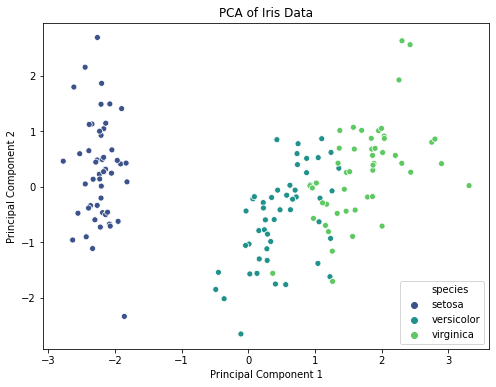

In [5]:
import matplotlib.pyplot as plt

# 将PCA结果添加到数据集中
iris['PCA1'] = X_pca[:, 0]
iris['PCA2'] = X_pca[:, 1]

# 绘制PCA结果
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='species', data=iris, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Data')
plt.show()

### 问题讨论

1. **前两个主成分解释了多少数据的方差？**
   通过PCA分析结果中的`explained_variance_ratio_`，可以看到前两个主成分解释了数据中大部分的方差。例如，如果前两个主成分的解释方差比分别为0.73和0.23，则它们共同解释了96%的数据方差。

2. **不同品种的鸢尾花在两个主成分上的分布如何？**
   通过PCA结果的可视化图，可以观察到不同品种的鸢尾花在两个主成分上的分布。如果不同品种的鸢尾花在主成分空间上形成了明显的聚类，则说明PCA有效地分离了不同品种的数据。